In [15]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# optimizer: change the value of weight and biases: to looking for minimum cost
from keras.optimizers import Adam, SGD

In [16]:
model = Sequential()

In [17]:
# units: how many output value
# input_shape: how many input value
# Dense: as its core do linear function, means if we dont apply any activation function, so it is linear activation function
model.add(Dense(units = 1, input_shape=(6,)))

In [18]:
model.summary()

# here we have to 2 parameter, that is  "weight and bias"

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer = Adam(lr=0.8), loss='mean_squared_error')

In [20]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')

In [21]:
'''df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')'''
X = df.iloc[:,0:4]
y = df.iloc[:,-1]
encode_x=LabelEncoder()
X_new=encode_x.fit_transform(X.iloc[:,-1])
X.iloc[:,-1]=X_new

ohe=OneHotEncoder(categorical_features=[-1])
X=ohe.fit_transform(X).toarray()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
y

C:\Users\Ankan Bal\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Ankan Bal\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [23]:
# find value w and b, to have minimum loss
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
40/40 [==============================] - 0s 150us/step - loss: 8811321344.0000
Epoch 2/50
40/40 [==============================] - 0s 125us/step - loss: 10617682841.6000
Epoch 3/50
40/40 [==============================] - 0s 125us/step - loss: 1269069875.2000
Epoch 4/50
40/40 [==============================] - 0s 175us/step - loss: 3233273753.6000
Epoch 5/50
40/40 [==============================] - 0s 125us/step - loss: 4882306534.4000
Epoch 6/50
40/40 [==============================] - 0s 125us/step - loss: 763589401.6000
Epoch 7/50
40/40 [==============================] - 0s 125us/step - loss: 1315378636.8000
Epoch 8/50
40/40 [==============================] - 0s 150us/step - loss: 2435578291.2000
Epoch 9/50
40/40 [==============================] - 0s 150us/step - loss: 521572294.4000
Epoch 10/50
40/40 [==============================] - 0s 125us/step - loss: 921511424.0000
Epoch 11/50
40/40 [==============================] - 0s 325us/step - loss: 1302755737.6000
Epoch 12/5

In [32]:
y_pred = model.predict(X)

ValueError: x and y must have same first dimension, but have shapes (10, 6) and (50, 1)

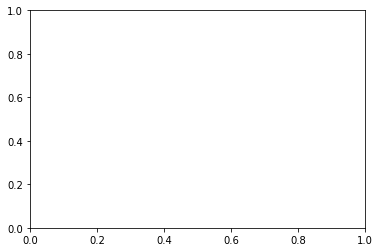

In [30]:
import  matplotlib.pyplot  as plt
'''df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')'''
plt.plot(X_test, y_pred, color='red')

In [33]:
W, B = model.get_weights()

In [34]:
W

array([[3.5225606 ],
       [5.803925  ],
       [1.7798454 ],
       [0.73209625],
       [0.36024255],
       [0.07053756]], dtype=float32)

In [35]:
B

array([3.2329173], dtype=float32)

In [36]:
# Evaluating Model Performance
from sklearn.metrics import r2_score
print("The R2 score is {:0.3f}".format(r2_score(y_test, y_pred)))

ValueError: Found input variables with inconsistent numbers of samples: [10, 50]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [22]:
# reset the weight to again train, detraining 

W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [23]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [24]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [25]:
from sklearn.metrics import mean_squared_error as mse

In [26]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	383.1
The Mean Squared Error on the Test set is:	384.3


In [27]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.628
The R2 score on the Test set is:	0.628


In [28]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
